In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import cv2

# Load the image
img = cv2.imread('testimages/root7.jpg')
img.shape


(1735, 1735, 3)

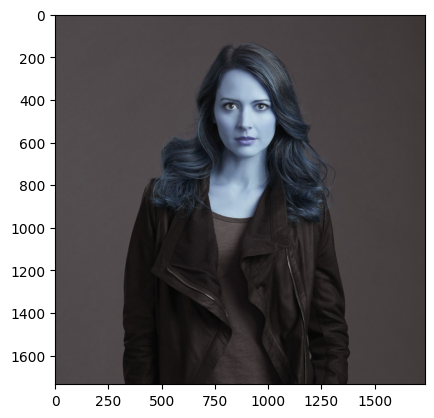

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1735, 1735)

In [5]:
gray

array([[75, 75, 76, ..., 56, 55, 54],
       [75, 75, 76, ..., 55, 55, 54],
       [75, 75, 75, ..., 54, 54, 54],
       ...,
       [74, 74, 74, ..., 61, 60, 59],
       [73, 73, 73, ..., 61, 60, 59],
       [72, 72, 72, ..., 62, 61, 60]], dtype=uint8)

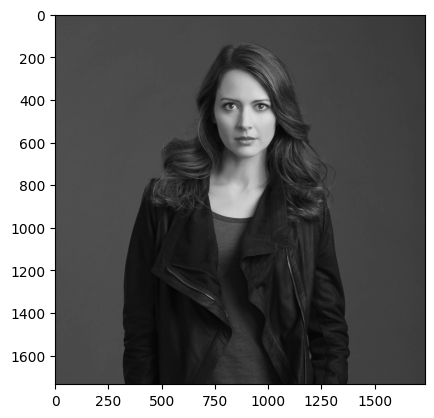

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('model\opencv\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('model\opencv\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[717, 301, 355, 355]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(717, 301, 355, 355)

Face Detection

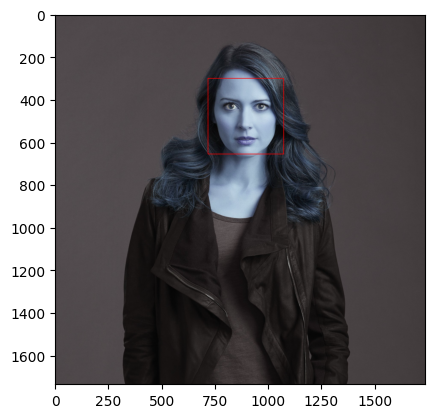

In [9]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

Eyes Detection

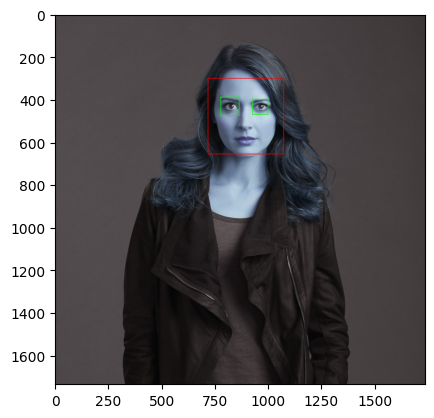

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

ROI - Region of Interest

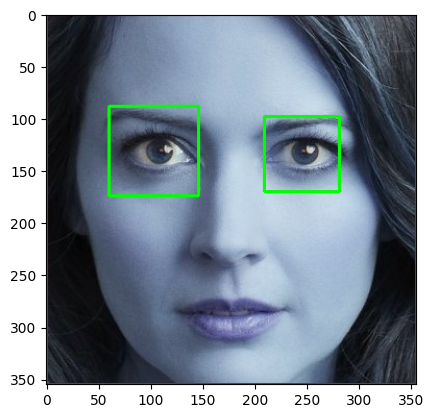

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

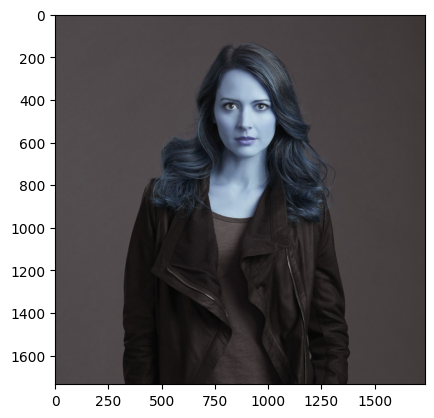

In [13]:
original_image = cv2.imread('testimages/root7.jpg')
plt.imshow(original_image)

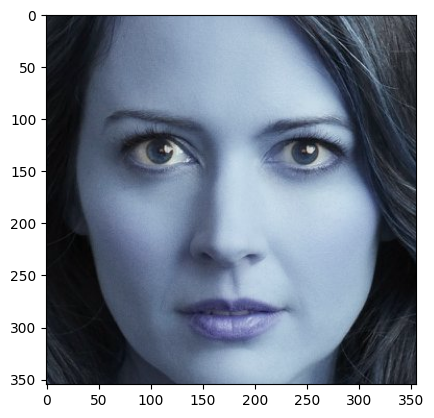

In [14]:
cropped_image = get_cropped_image_if_2_eyes('testimages/root7.jpg')
plt.imshow(cropped_image)

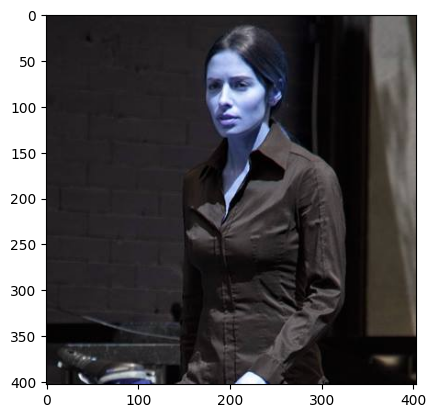

In [15]:
org_image = cv2.imread('testimages/shaw7.jpg')
plt.imshow(org_image)

In [16]:
path_to_data = "model/dataset/"
path_to_cr_data = "model/dataset/cropped/"

In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['model/dataset/fusco',
 'model/dataset/harold',
 'model/dataset/john',
 'model/dataset/root',
 'model/dataset/shaw']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1  

fusco
Generating cropped images in folder:  model/dataset/cropped/fusco
harold
Generating cropped images in folder:  model/dataset/cropped/harold
john
Generating cropped images in folder:  model/dataset/cropped/john
root
Generating cropped images in folder:  model/dataset/cropped/root
shaw
Generating cropped images in folder:  model/dataset/cropped/shaw


Feature Engineering using wavelet

In [21]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

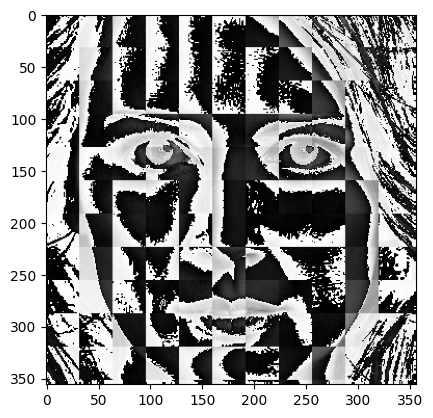

In [22]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [23]:
celebrity_file_names_dict

{'fusco': ['model/dataset/cropped/fusco/fusco1.png',
  'model/dataset/cropped/fusco/fusco2.png',
  'model/dataset/cropped/fusco/fusco3.png',
  'model/dataset/cropped/fusco/fusco4.png',
  'model/dataset/cropped/fusco/fusco5.png',
  'model/dataset/cropped/fusco/fusco6.png',
  'model/dataset/cropped/fusco/fusco7.png',
  'model/dataset/cropped/fusco/fusco8.png',
  'model/dataset/cropped/fusco/fusco9.png',
  'model/dataset/cropped/fusco/fusco10.png',
  'model/dataset/cropped/fusco/fusco11.png',
  'model/dataset/cropped/fusco/fusco12.png',
  'model/dataset/cropped/fusco/fusco13.png',
  'model/dataset/cropped/fusco/fusco14.png',
  'model/dataset/cropped/fusco/fusco15.png',
  'model/dataset/cropped/fusco/fusco16.png',
  'model/dataset/cropped/fusco/fusco17.png',
  'model/dataset/cropped/fusco/fusco18.png',
  'model/dataset/cropped/fusco/fusco19.png',
  'model/dataset/cropped/fusco/fusco20.png',
  'model/dataset/cropped/fusco/fusco21.png',
  'model/dataset/cropped/fusco/fusco22.png',
  'model/d

In [24]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'fusco': 0, 'harold': 1, 'john': 2, 'root': 3, 'shaw': 4}

In [25]:

X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])    

In [26]:
len(X[0])

4096

In [27]:
X[0]

array([[ 12],
       [ 17],
       [ 30],
       ...,
       [  3],
       [245],
       [240]], dtype=uint8)

In [28]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(203, 4096)

Data Modeling & Training

In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7450980392156863

In [31]:
len(X_test)

51

In [32]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       1.00      0.50      0.67         8
           2       0.69      0.90      0.78        10
           3       0.70      0.64      0.67        11
           4       0.71      0.83      0.77        12

    accuracy                           0.75        51
   macro avg       0.78      0.73      0.74        51
weighted avg       0.77      0.75      0.74        51



In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [34]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [35]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.677419,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.504946,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.709892,{'logisticregression__C': 10}


In [36]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [37]:
best_estimators['svm'].score(X_test,y_test)

0.803921568627451

In [38]:
best_estimators['random_forest'].score(X_test,y_test)

0.5098039215686274

In [39]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8823529411764706

In [40]:
best_clf = best_estimators['logistic_regression']

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 1,  0,  9,  0,  0],
       [ 1,  1,  0,  8,  1],
       [ 0,  0,  0,  2, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

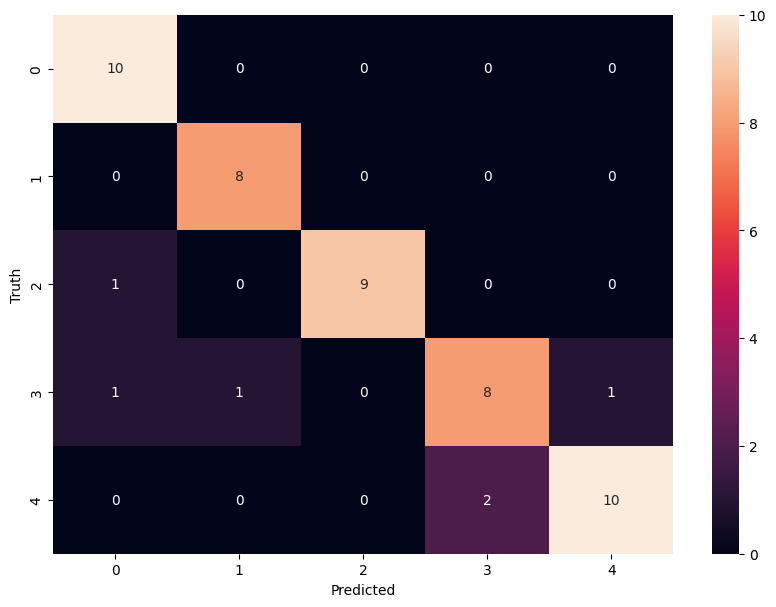

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
class_dict

{'fusco': 0, 'harold': 1, 'john': 2, 'root': 3, 'shaw': 4}

In [44]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

The predicted class is: fusco


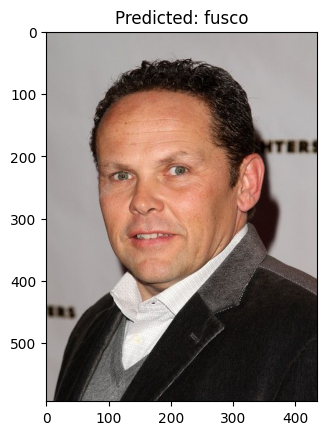

In [51]:
import cv2
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = joblib.load('saved_model.pkl')

# Function to preprocess the image and extract features
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        return None
    (x, y, w, h) = faces[0]
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) < 2:
        return None

    # Resizing and combining raw and wavelet-transformed images
    scalled_raw_img = cv2.resize(roi_color, (32, 32))
    img_har = w2d(roi_color, 'db1', 5)
    scalled_img_har = cv2.resize(img_har, (32, 32))
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
    return combined_img.reshape(1, 4096).astype(float)

# Preprocess the input image
input_image_path = 'testimages/sample5.jpg'
input_image_features = preprocess_image(input_image_path)

# Check if face with two eyes is detected
if input_image_features is not None:
    # Predict the class of the image
    prediction = model.predict(input_image_features)[0]

    # Mapping of class labels
    class_dict = {'fusco': 0, 'harold': 1, 'john': 2, 'root': 3, 'shaw': 4}
    class_dict_rev = {v: k for k, v in class_dict.items()}

    print(f"The predicted class is: {class_dict_rev[prediction]}")
else:
    print("No face with two eyes detected in the image.")

# Display the image
img = cv2.imread(input_image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {class_dict_rev[prediction] if input_image_features is not None else 'No face detected'}")
plt.show()
